# Einlesen der Daten

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from Code.S02_Allgemein.process_hdf5 import plot_from_exp_id

plt.rcParams['figure.figsize'] = [13, 10] # Größe der Figure festsetzen

In [2]:
path = r"C:\Users\timbr\OneDrive\Masterarbeit\Daten\2020_09_02_Monte_Carlo_2_final\\"
filename = "2020_09_06__19_29_48_Monte_Carlo_DataFrame.pkl"

df_raw = pd.read_pickle(path+filename)

In [3]:
numeric_columns = ['dist_id', 'resloss_sum', 'yexceed+5%', 'resloss_dist', 'signal_power', 'model_qual', 'fp_new', 'false_neg_count', 'overlap']

for i in numeric_columns:
    df_raw[i] = df_raw[i].apply(pd.to_numeric, errors='coerce')

print(df_raw.shape)

(1104, 46)


In [4]:
df = df_raw[df_raw['disq']==0]
df['fn_spider1'] = 0
df['fn_spider2'] = 0

df.loc[df['time_to_detect1'] >= 40, ['fn_spider1']] = 1
df.loc[df['time_to_detect1'] > 40, ['time_to_detect1']] = 40

df.loc[df['time_to_detect2'] >= 40, ['fn_spider2']] = 1
df.loc[df['time_to_detect2'] > 40, ['time_to_detect2']] = 40

# False Negative pro Störung
df['fn_new'] = (df['fn_spider1'] + df['fn_spider2'])/2

# von pro Simulation auf pro Störung
df['fp_new'] = df['fp_new']/2

C:\Users\timbr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\timbr\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\timbr\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [5]:
df_raw[df_raw['detect_mode'] != 'model ar l'].shape

(1104, 46)

In [6]:
df['ttd'] = (df['time_to_detect1'] + df['time_to_detect2'])/2
df_group = df[['sigma', 'ttd', 'fp_new', 'fn_new', 'overlap']].groupby(['sigma']).mean()
df_group['gültige'] = df[['sigma', 'ttd']].groupby(['sigma']).count()

df_group = df_group.round(2)
df_group

C:\Users\timbr\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ttd,fp_new,fn_new,overlap,gültige
sigma,,,,,
0.00,8.56,0.04,0.07,0.82,184
0.10,11.48,0.03,0.11,0.80,184
0.15,15.23,0.06,0.21,0.77,184
0.25,19.09,0.06,0.35,0.74,183
0.50,20.73,0.06,0.41,0.73,183
0.75,21.40,0.14,0.41,0.71,182


In [6]:
df_group.to_csv('MC2_overview.csv')

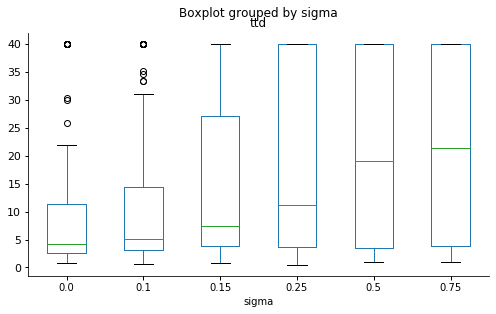

In [7]:
ax = df.boxplot('ttd', by='sigma', figsize=(8, 4.5))

ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(direction="out", width=1)
ax.xaxis.set_tick_params(direction="out", width=1)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(11)
    
plt.savefig('MC2_boxplot.svg')

# Betrachtung nach Kosinus
Aktuell nicht in Thesis

In [8]:
df2 = df[df['dist_name1'].str.contains('cosinus') == True]
df2_group = df2[['sigma', 'ttd', 'fp_new', 'fn_new', 'overlap']].groupby(['sigma']).mean()
df2_group['gültige'] = df2[['sigma', 'ttd']].groupby(['sigma']).count()


df2_group = df2_group.round(2)
df2_group

,ttd,fp_new,fn_new,overlap,gültige
sigma,,,,,
0.00,2.82,0.00,0.00,0.86,24
0.10,3.27,0.06,0.00,0.85,24
0.15,11.24,0.04,0.19,0.79,24
0.25,17.56,0.00,0.38,0.76,24
0.50,18.42,0.00,0.38,0.75,24
0.75,20.60,0.12,0.33,0.70,24


In [9]:
df2_group.to_csv('MC2_overview_cos.csv')

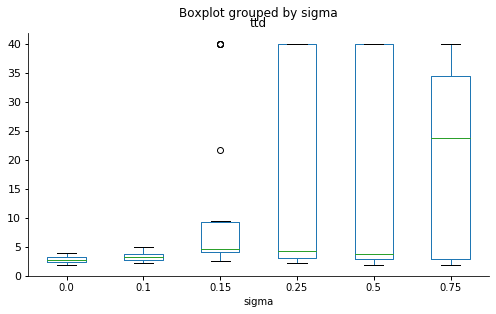

In [10]:
ax = df2.boxplot('ttd', by='sigma', figsize=(8, 4.5))

ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(direction="out", width=1)
ax.xaxis.set_tick_params(direction="out", width=1)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(11)
    
plt.savefig('MC2_boxplot_cos.svg')

# Signalleistung

In [8]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df1[['signal_power', 'time_to_detect', 'sigma']] = df[['signal_power1', 'time_to_detect1', 'sigma']]
df2[['signal_power', 'time_to_detect', 'sigma']] = df[['signal_power2', 'time_to_detect2', 'sigma']]
df_sig = pd.concat([df1, df2])

In [9]:
df1

,signal_power,time_to_detect,sigma
0,0.375000,1.68,0
1,0.375000,4.08,0.1
2,0.375000,40.00,0.15
3,0.026990,40.00,0.5
4,0.239913,4.55,0.5
...,...,...,...
1099,0.053373,40.00,0.5
1100,0.333583,18.65,0.5
1101,0.163456,8.56,0.5
1102,0.171189,8.56,0.5


In [13]:
df2

,signal_power,time_to_detect,sigma
0,0.375000,3.07,0
1,0.375000,4.49,0.1
2,0.375000,40.00,0.15
3,0.026990,40.00,0.5
4,0.239913,4.79,0.5
...,...,...,...
1099,0.053373,40.00,0.5
1100,0.333583,18.37,0.5
1101,0.163456,9.44,0.5
1102,0.171189,13.42,0.5


In [14]:
df_sig

,signal_power,time_to_detect,sigma
0,0.375000,1.68,0
1,0.375000,4.08,0.1
2,0.375000,40.00,0.15
3,0.026990,40.00,0.5
4,0.239913,4.55,0.5
...,...,...,...
1099,0.053373,40.00,0.5
1100,0.333583,18.37,0.5
1101,0.163456,9.44,0.5
1102,0.171189,13.42,0.5


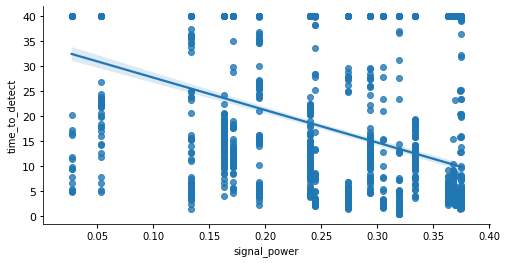

In [15]:
fig = plt.figure(figsize=(8, 4))
ax = sns.regplot(df_sig['signal_power'], df_sig['time_to_detect'])

ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(direction="out", width=1)
ax.xaxis.set_tick_params(direction="out", width=1)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(11)
    
plt.savefig('MC2_regplot.svg')

In [11]:
df_exact = df_sig[df_sig['sigma']==0]

df_exact

,signal_power,time_to_detect,sigma
0,0.375000,1.68,0
12,0.274303,2.68,0
14,0.134106,4.01,0
26,0.274303,4.08,0
27,0.134106,37.39,0
...,...,...,...
1070,0.333583,9.44,0
1072,0.171189,11.21,0
1073,0.293888,9.44,0
1074,0.026990,40.00,0


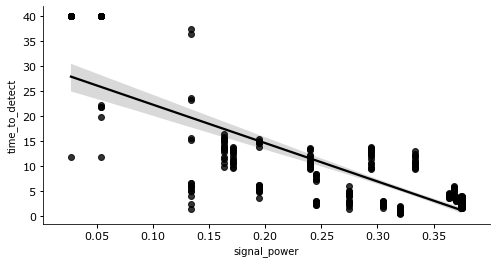

In [12]:
fig = plt.figure(figsize=(8, 4))
ax = sns.regplot(df_exact['signal_power'], df_exact['time_to_detect'], color='black')

ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_tick_params(direction="out", width=1)
ax.xaxis.set_tick_params(direction="out", width=1)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(11)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(11)

plt.yticks(fontname = "Verdana")
plt.xticks(fontname = "Verdana")
plt.savefig('MC2_regplot.svg')

# Erkennung vor erstem Peak

In [43]:
df_cos = df[df['dist_name1'].str.contains('cosinus') == True]

df_cos['duration_1'] = 0
df_cos['duration_2'] = 0

df.loc[df['time_to_detect1'] > 40, ['time_to_detect1']] = 40

df_cos.loc[df_cos['dist_name1']=='cosinus_1', ['duration_1']] = 5
df_cos.loc[df_cos['dist_name1']=='cosinus_2', ['duration_1']] = 8
df_cos.loc[df_cos['dist_name1']=='cosinus_3', ['duration_1']] = 10
df_cos.loc[df_cos['dist_name2']=='cosinus_1', ['duration_2']] = 5
df_cos.loc[df_cos['dist_name2']=='cosinus_2', ['duration_2']] = 8
df_cos.loc[df_cos['dist_name2']=='cosinus_3', ['duration_2']] = 10

C:\Users\timbr\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\timbr\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\timbr\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [44]:
df_cos[['dist_name1', 'dist_name2', 'duration_1', 'duration_2', 'time_to_detect1', 'time_to_detect2', 'b4fp1']]

KeyError: "['b4fp1'] not in index"

In [45]:
df_cos['b4fp1'] = 0
df_cos['b4fp2'] = 0

df_cos.loc[df_cos['time_to_detect1'] < (df_cos['duration_1']/2), ['b4fp1']] = 1
df_cos.loc[df_cos['time_to_detect2'] < (df_cos['duration_2']/2), ['b4fp2']] = 1

df_cos['b4fp'] = (df_cos['b4fp1'] + df_cos['b4fp2'])/2
df_cos_group = df_cos[['b4fp', 'sigma']].groupby('sigma').mean()

C:\Users\timbr\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\timbr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\timbr\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [46]:
df_cos_group.round(2).to_csv('MC2_b4p.csv')

In [47]:
df[df['dist_name1'].str.contains('cosinus') == True].groupby(['dist_name1']).count()

,A,deadtime,detect_mode,dist_id,dist_name,exp_id,model_qual,noise_sigma,q,react_mode,...,time_to_recover2,yexceed_dist1,yexceed_dist2,signal_power1,signal_power2,disq,fn_spider1,fn_spider2,fn_new,ttd
dist_name1,,,,,,,,,,,,,,,,,,,,,
cosinus_1,48,48,48,48,0,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
cosinus_2,48,48,48,48,0,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
cosinus_3,48,48,48,48,0,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
